In [1]:
import pandas as pd

In [2]:
file_path = 'wiley_results.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

print(df.to_string(index=False))

  №                                                                                                                                                                              Название                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Авторы                                                                Журнал                   Выпуск                    Дата публикации                                                                                                                   Ссылка
  1                                                    

C:\Users\User\AppData\Local\Temp\ipykernel_3568\4137911854.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


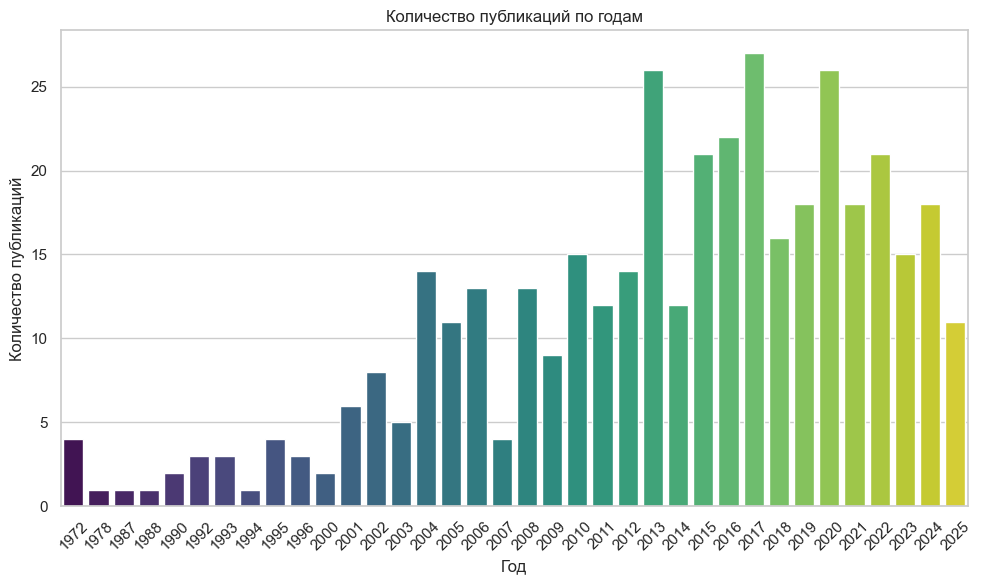

C:\Users\User\AppData\Local\Temp\ipykernel_3568\4137911854.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=journal_counts.index, x=journal_counts.values, palette="coolwarm")


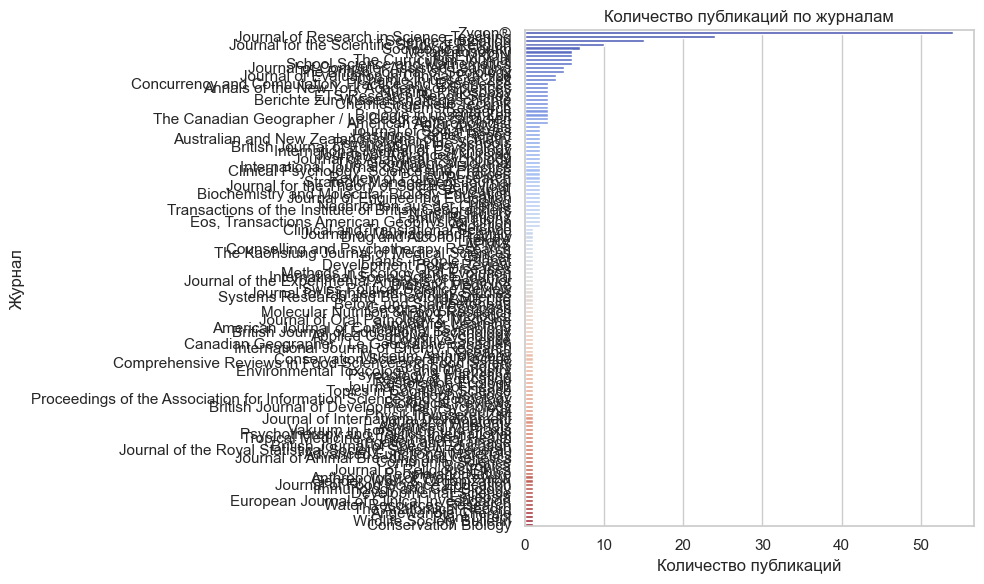

C:\Users\User\AppData\Local\Temp\ipykernel_3568\4137911854.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=issue_counts.index, x=issue_counts.values, palette="magma")


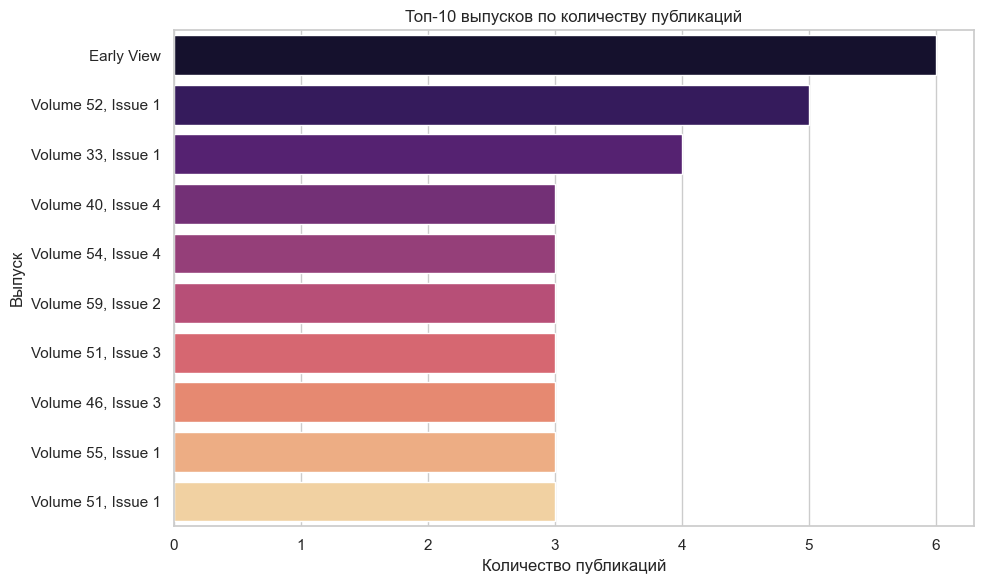

C:\Users\User\AppData\Local\Temp\ipykernel_3568\4137911854.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(top_authors.keys()), x=list(top_authors.values()), palette="cubehelix")


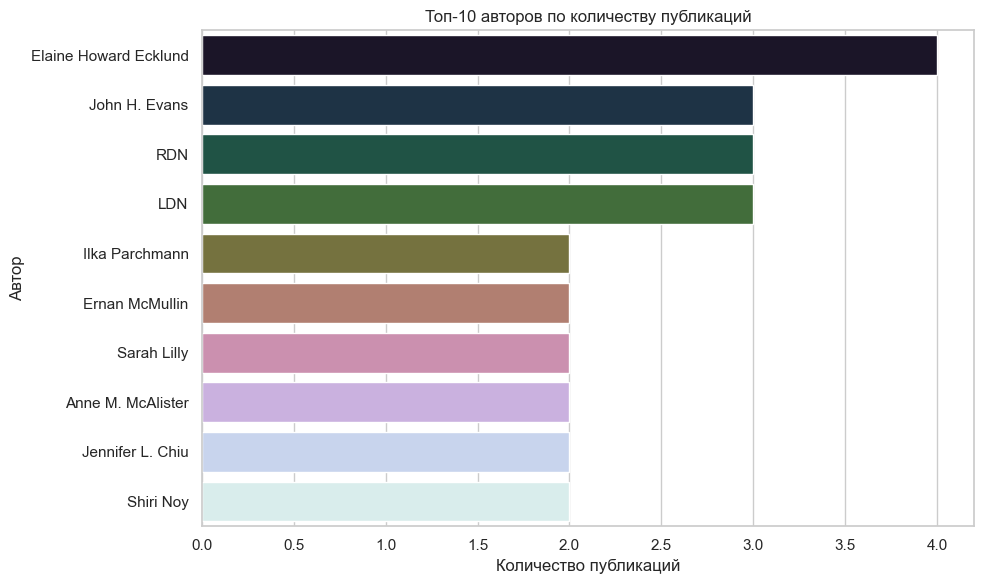

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Настройки графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Загрузка данных
df = pd.read_csv("wiley_results.csv")  # замените путь при необходимости

# Функция для извлечения года из строки
def extract_year(date_str):
    match = re.search(r'\b(\d{4})\b', str(date_str))
    return int(match.group(1)) if match else None

df['Год'] = df['Дата публикации'].apply(extract_year)

# === 1. График: количество публикаций по годам ===
year_counts = df['Год'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title('Количество публикаций по годам')
plt.xlabel('Год')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 2. График: количество публикаций по журналам ===
journal_counts = df['Журнал'].value_counts()
sns.barplot(y=journal_counts.index, x=journal_counts.values, palette="coolwarm")
plt.title('Количество публикаций по журналам')
plt.xlabel('Количество публикаций')
plt.ylabel('Журнал')
plt.tight_layout()
plt.show()

# === 3. График: распределение по выпускам ===
issue_counts = df['Выпуск'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(y=issue_counts.index, x=issue_counts.values, palette="magma")
plt.title('Топ-10 выпусков по количеству публикаций')
plt.xlabel('Количество публикаций')
plt.ylabel('Выпуск')
plt.tight_layout()
plt.show()

# === 4. График: топ-10 самых частых авторов ===
from collections import Counter

# Разделим авторов и посчитаем частоту
all_authors = df['Авторы'].dropna().str.split(', ')
flat_authors = [author.strip() for sublist in all_authors for author in sublist]
author_counts = Counter(flat_authors)
top_authors = dict(author_counts.most_common(10))

sns.barplot(y=list(top_authors.keys()), x=list(top_authors.values()), palette="cubehelix")
plt.title('Топ-10 авторов по количеству публикаций')
plt.xlabel('Количество публикаций')
plt.ylabel('Автор')
plt.tight_layout()
plt.show()